# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
## Analysis

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [107]:
# List for holding lat_lngs, cities, and countries
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

618
618


In [108]:
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Wind Speed': ""})
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,souillac,,MU,,,,,,
1,vaini,,TO,,,,,,
2,ushuaia,,AR,,,,,,
3,illoqqortoormiut,,GL,,,,,,
4,nanortalik,,GL,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [109]:
# Variables holding response data for record number and record set
rec_num = 1
rec_set = 1

# Base URL for weather data
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&q="

# Print statement before checking data
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')

# for loop to iterate through and find weather data on various cities 
for index, row in city_weather.iterrows():
    
    # Create the query url for the API call
    query_url = url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    # API call
    response = requests.get(query_url).json()    
    
    # Exception script in case city is not found 
    try:
        print(f"Processing Weather Data for Record {rec_num} of Set {rec_set} | {response['name']}")
        
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Wind Speed'] = response['wind']['speed']
        
        # Increase the record count
        rec_num += 1
    
    
    except (KeyError, IndexError):
        print(f"City not found ... Skipping.")
    
    # If statement to handle API call limits
    if rec_num == 51:
        rec_set += 1
        rec_num = 1
        time.sleep(30)
        
print('''
-----------------------------
Data Retrieval Complete      
-----------------------------''')
        
        
   


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Weather Data for Record 1 of Set 1 | Souillac
Processing Weather Data for Record 2 of Set 1 | Vaini
Processing Weather Data for Record 3 of Set 1 | Ushuaia
City not found ... Skipping.
Processing Weather Data for Record 4 of Set 1 | Nanortalik
Processing Weather Data for Record 5 of Set 1 | Cherskiy
Processing Weather Data for Record 6 of Set 1 | Punta Arenas
Processing Weather Data for Record 7 of Set 1 | Dicabisagan
Processing Weather Data for Record 8 of Set 1 | Atar
Processing Weather Data for Record 9 of Set 1 | Albany
Processing Weather Data for Record 10 of Set 1 | Cap-aux-Meules
Processing Weather Data for Record 11 of Set 1 | Jamestown
Processing Weather Data for Record 12 of Set 1 | Shingū
City not found ... Skipping.
City not found ... Skipping.
Processing Weather Data for Record 13 of Set 1 | Sittwe
Processing Weather Data for Record 14 of Set 1 | Ilulissat
Processing Weather Da

Processing Weather Data for Record 31 of Set 3 | Atuona
Processing Weather Data for Record 32 of Set 3 | Tuatapere
Processing Weather Data for Record 33 of Set 3 | Port Hedland
Processing Weather Data for Record 34 of Set 3 | Alice Springs
Processing Weather Data for Record 35 of Set 3 | Jalu
Processing Weather Data for Record 36 of Set 3 | Bethel
Processing Weather Data for Record 37 of Set 3 | Longyearbyen
Processing Weather Data for Record 38 of Set 3 | Thompson
Processing Weather Data for Record 39 of Set 3 | Saint Paul Harbor
Processing Weather Data for Record 40 of Set 3 | Tsagan Aman
Processing Weather Data for Record 41 of Set 3 | Tevaitoa
Processing Weather Data for Record 42 of Set 3 | Portland
Processing Weather Data for Record 43 of Set 3 | Waipawa
Processing Weather Data for Record 44 of Set 3 | Carnarvon
Processing Weather Data for Record 45 of Set 3 | Mananjary
Processing Weather Data for Record 46 of Set 3 | Santo Tomas
Processing Weather Data for Record 47 of Set 3 | H

Processing Weather Data for Record 10 of Set 6 | Iqaluit
Processing Weather Data for Record 11 of Set 6 | Hastings
City not found ... Skipping.
Processing Weather Data for Record 12 of Set 6 | Tommot
Processing Weather Data for Record 13 of Set 6 | Clyde River
Processing Weather Data for Record 14 of Set 6 | Amapá
Processing Weather Data for Record 15 of Set 6 | Moranbah
Processing Weather Data for Record 16 of Set 6 | Guadalupe y Calvo
Processing Weather Data for Record 17 of Set 6 | Yulara
Processing Weather Data for Record 18 of Set 6 | Mozarlândia
City not found ... Skipping.
Processing Weather Data for Record 19 of Set 6 | Atambua
Processing Weather Data for Record 20 of Set 6 | Oistins
Processing Weather Data for Record 21 of Set 6 | Joensuu
Processing Weather Data for Record 22 of Set 6 | Balud
Processing Weather Data for Record 23 of Set 6 | Laurinburg
Processing Weather Data for Record 24 of Set 6 | Khonsa
Processing Weather Data for Record 25 of Set 6 | Holetown
Processing We

Processing Weather Data for Record 42 of Set 8 | Santa Vitória do Palmar
Processing Weather Data for Record 43 of Set 8 | Pisco
Processing Weather Data for Record 44 of Set 8 | Puerto Escondido
City not found ... Skipping.
City not found ... Skipping.
Processing Weather Data for Record 45 of Set 8 | Manokwari
City not found ... Skipping.
Processing Weather Data for Record 46 of Set 8 | Smithers
Processing Weather Data for Record 47 of Set 8 | Sanmenxia
Processing Weather Data for Record 48 of Set 8 | Rocha
Processing Weather Data for Record 49 of Set 8 | Wilmington
Processing Weather Data for Record 50 of Set 8 | Sioux Lookout
City not found ... Skipping.
Processing Weather Data for Record 1 of Set 9 | Taicheng
City not found ... Skipping.
Processing Weather Data for Record 2 of Set 9 | Mariënburg
City not found ... Skipping.
Processing Weather Data for Record 3 of Set 9 | Grand Gaube
Processing Weather Data for Record 4 of Set 9 | Belmonte
Processing Weather Data for Record 5 of Set 9

Processing Weather Data for Record 22 of Set 11 | Russkaya Polyana
Processing Weather Data for Record 23 of Set 11 | Nísia Floresta
Processing Weather Data for Record 24 of Set 11 | Bambanglipuro
Processing Weather Data for Record 25 of Set 11 | Isangel
Processing Weather Data for Record 26 of Set 11 | Filingué
Processing Weather Data for Record 27 of Set 11 | Kiri Buru
Processing Weather Data for Record 28 of Set 11 | Dhidhdhoo
Processing Weather Data for Record 29 of Set 11 | Usinsk
Processing Weather Data for Record 30 of Set 11 | Krasnosel'kup
Processing Weather Data for Record 31 of Set 11 | Shirokiy
Processing Weather Data for Record 32 of Set 11 | Dakar
Processing Weather Data for Record 33 of Set 11 | Kungurtug
Processing Weather Data for Record 34 of Set 11 | Noumea
Processing Weather Data for Record 35 of Set 11 | Ruteng
Processing Weather Data for Record 36 of Set 11 | Conde
Processing Weather Data for Record 37 of Set 11 | Molteno
Processing Weather Data for Record 38 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [110]:
# Clean data frame and remove cities that weren't found
city_weather["Max Temp"] = city_weather["Max Temp"].replace("", np.nan)
city_weather = city_weather.dropna()

# Save to csv in ouput_data folder
city_weather.to_csv("../output_data/city_weather.csv", index=False, header=True)

# Display dataframe
city_weather.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,souillac,75,MU,1619395665,88,-20.5167,57.5167,77.00,14.97
1,vaini,75,TO,1619395666,83,-21.2,-175.2,80.60,6.91
2,ushuaia,75,AR,1619395666,71,-54.8,-68.3,48.20,20.71
4,nanortalik,100,GL,1619395667,85,60.1432,-45.2371,39.25,7.7
5,cherskiy,95,RU,1619395667,83,68.75,161.3,17.42,6.22
6,punta arenas,75,CL,1619395667,87,-53.15,-70.9167,48.20,10.36
7,dicabisagan,59,PH,1619395668,76,17.0818,122.416,77.86,5.46
8,atar,0,MR,1619395668,19,20.5169,-13.0499,78.49,3.69
9,albany,90,AU,1619395669,100,-35.0169,117.892,55.40,1.14
10,cap-aux-meules,76,CA,1619395503,81,47.3821,-61.8597,41.00,11.5


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [111]:
#  Get the indices of cities that have humidity over 100%
city_index = city_weather.index
humidity_condition = city_weather["Humidity"] > 100
humidity_indices = city_index[humidity_condition]
humidity_indices_list = humidity_indices.tolist()

print(humidity_indices_list)
print("There are no cities with humidity above 100% ... skip")

[]
There are no cities with humidity above 100% ... skip


In [112]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index
city_weather.drop(city_weather.loc[city_weather["Humidity"] > 100].index, inplace=False)

# Display dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,souillac,75,MU,1619395665,88,-20.5167,57.5167,77.00,14.97
1,vaini,75,TO,1619395666,83,-21.2,-175.2,80.60,6.91
2,ushuaia,75,AR,1619395666,71,-54.8,-68.3,48.20,20.71
4,nanortalik,100,GL,1619395667,85,60.1432,-45.2371,39.25,7.7
5,cherskiy,95,RU,1619395667,83,68.75,161.3,17.42,6.22


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Scatter Plot

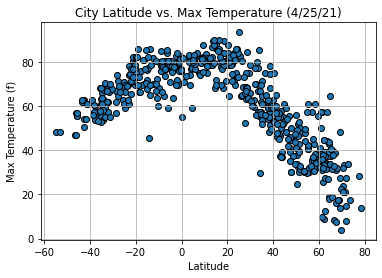

In [113]:
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.title("City Latitude vs. Max Temperature (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs max temp.png")

plt.show()

## Latitude vs. Humidity Scatter Plot

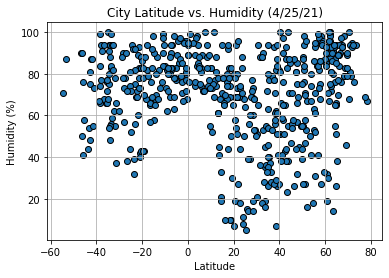

In [114]:
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs max temp.png")

plt.show()

## Latitude vs. Cloudiness Scatter Plot

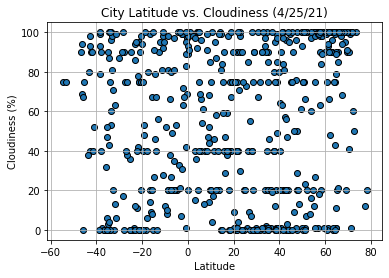

In [115]:
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs max temp.png")

plt.show()

## Latitude vs. Wind Speed Scatter Plot

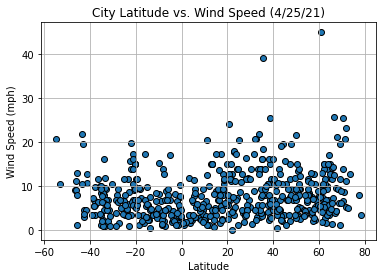

In [116]:
plt.scatter(city_weather["Lat"], city_weather["Wind Speed"], marker="o", edgecolors="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs max temp.png")

plt.show()

## Linear Regression

In [124]:
X = 0
n_hem = city_weather.query(f"Lat >= {X}")
s_hem = city_weather.query(f"Lat < {X}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

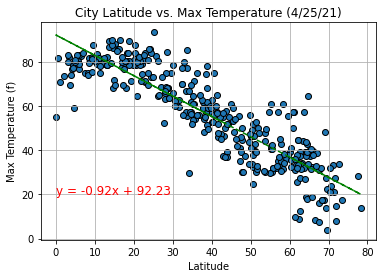

In [131]:
x_val = n_hem["Lat"].astype("float")
y_val = n_hem["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, std_err) = linregress(x_val, y_val)
city_fit = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_val, y_val, marker="o", edgecolors="black")
plt.plot(x_val, city_fit, "g--")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.title("Northern Hemisphere Max Temperature vs. Latitude (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs max temp nh_lin_reg.png")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

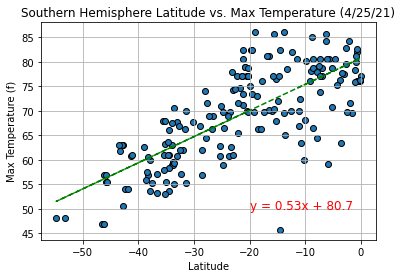

In [134]:
x_val = s_hem["Lat"].astype("float")
y_val = s_hem["Max Temp"].astype("float")

(slope, intercept, rvalue, pvalue, std_err) = st.linregress(x_val, y_val)
city_fit = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_val, y_val, marker="o", edgecolors="black")
plt.plot(x_val, city_fit, "g--")
plt.annotate(line_eq,(-20,50),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (f)")
plt.title("Southern Hemisphere Max Temperature vs. Latitude (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs max temp sh_lin_reg.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

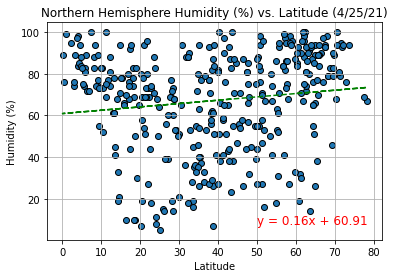

In [139]:
x_val = n_hem["Lat"].astype("float")
y_val = n_hem["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, std_err) = linregress(x_val, y_val)
city_fit = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_val, y_val, marker="o", edgecolors="black")
plt.plot(x_val, city_fit, "g--")
plt.annotate(line_eq,(50,8),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Humidity (%) vs. Latitude (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs humid nh_lin_reg.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

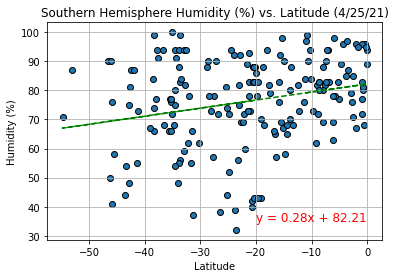

In [142]:
x_val = s_hem["Lat"].astype("float")
y_val = s_hem["Humidity"].astype("float")

(slope, intercept, rvalue, pvalue, std_err) = linregress(x_val, y_val)
city_fit = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_val, y_val, marker="o", edgecolors="black")
plt.plot(x_val, city_fit, "g--")
plt.annotate(line_eq,(-20,35),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Humidity (%) vs. Latitude (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs humid sh_lin_reg.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

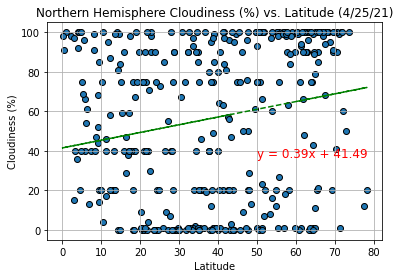

In [145]:
x_val = n_hem["Lat"].astype("float")
y_val = n_hem["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, std_err) = linregress(x_val, y_val)
city_fit = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_val, y_val, marker="o", edgecolors="black")
plt.plot(x_val, city_fit, "g--")
plt.annotate(line_eq,(50,37),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cloudiness (%) vs. Latitude (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs cloudiness nh_lin_reg.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

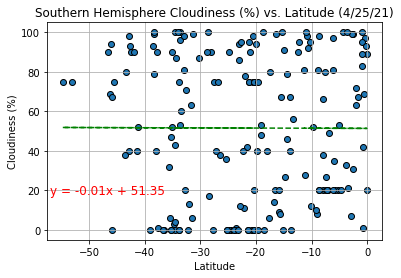

In [147]:
x_val = s_hem["Lat"].astype("float")
y_val = s_hem["Cloudiness"].astype("float")

(slope, intercept, rvalue, pvalue, std_err) = linregress(x_val, y_val)
city_fit = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_val, y_val, marker="o", edgecolors="black")
plt.plot(x_val, city_fit, "g--")
plt.annotate(line_eq,(-57,18),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere Cloudiness (%) vs. Latitude (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs cloudiness sh_lin_reg.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

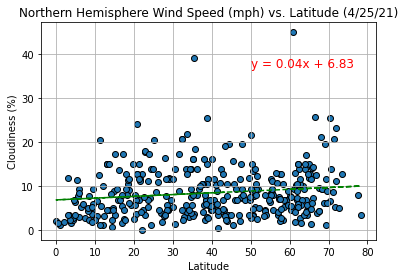

In [149]:
x_val = n_hem["Lat"].astype("float")
y_val = n_hem["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, std_err) = linregress(x_val, y_val)
city_fit = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_val, y_val, marker="o", edgecolors="black")
plt.plot(x_val, city_fit, "g--")
plt.annotate(line_eq,(50,37),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Wind Speed (mph) vs. Latitude (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs wind nh_lin_reg.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

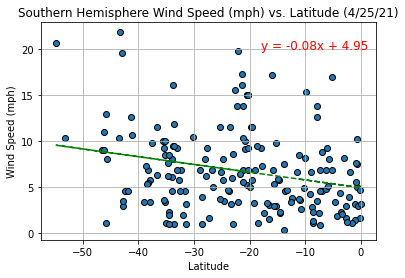

In [152]:
x_val = s_hem["Lat"].astype("float")
y_val = s_hem["Wind Speed"].astype("float")

(slope, intercept, rvalue, pvalue, std_err) = linregress(x_val, y_val)
city_fit = slope * x_val + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x_val, y_val, marker="o", edgecolors="black")
plt.plot(x_val, city_fit, "g--")
plt.annotate(line_eq,(-18,20),fontsize=12,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Wind Speed (mph) vs. Latitude (4/25/21)")
plt.grid(True)

plt.savefig("../output_data/latitude vs wind sh_lin_reg.png")

plt.show()